# Alucar - Análise de Vendas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alucar = pd.read_csv('./datasets/alucar.csv')

alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print(f'Quantidade de linhas: {alucar.shape[0]}\nQuantidade de colunas: {alucar.shape[1]}')

Quantidade de linhas: 24
Quantidade de colunas: 2


Como os registros são feitos por mês, e temos 24 linhas, provavelmente estamos tratando de um dataset de 2 anos de informações

In [4]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
sns.__version__

'0.11.1'

<AxesSubplot:xlabel='mes', ylabel='vendas'>

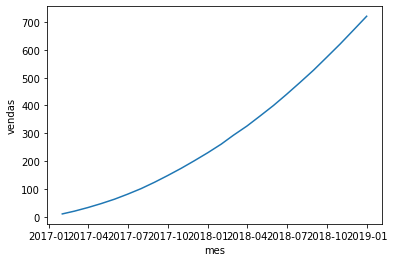

In [8]:
sns.lineplot(data=alucar, x='mes', y='vendas')

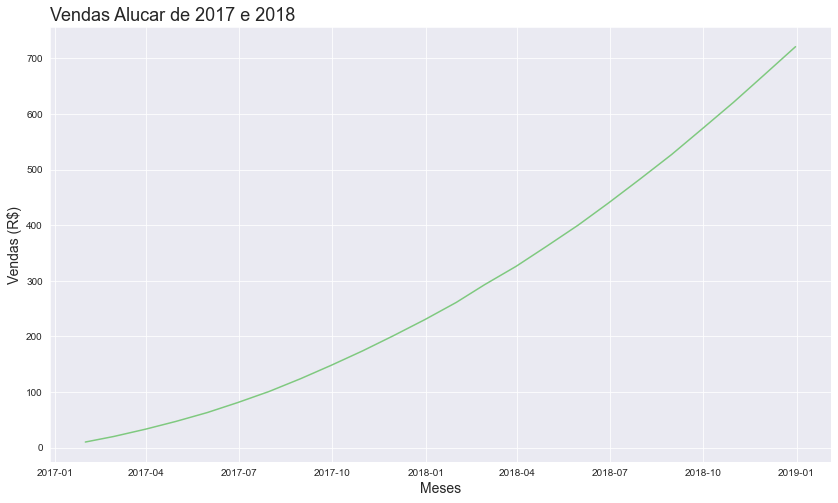

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(data=alucar, x='mes', y='vendas')
ax.figure.set_size_inches(14, 8)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14);

In [10]:
alucar['aumento'] = alucar['vendas'].diff()

alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


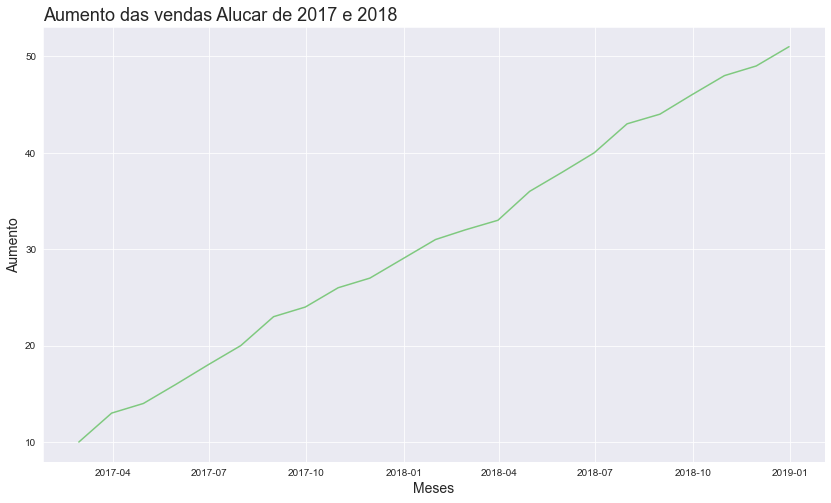

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(data=alucar, x='mes', y='aumento')
ax.figure.set_size_inches(14, 8)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14);

In [12]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')

    ax = sns.lineplot(data=dataset, x=x, y=y)
    ax.figure.set_size_inches(14, 8)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14);

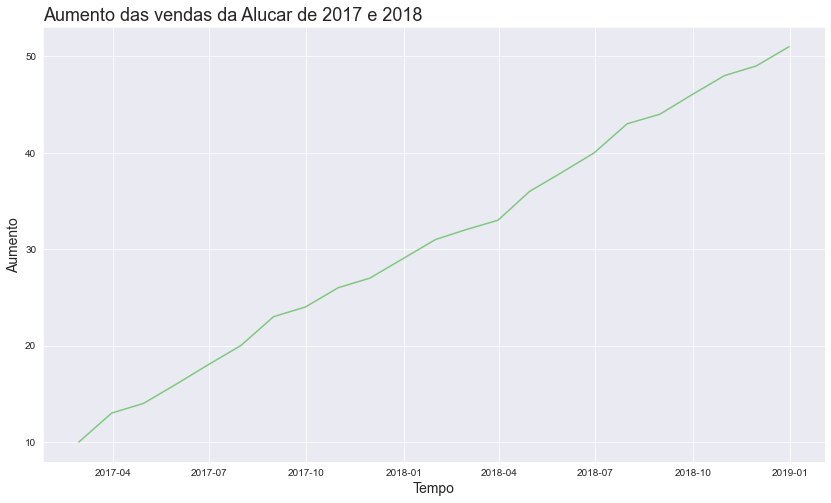

In [13]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [14]:
alucar['aceleracao'] = alucar['aumento'].diff()

alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


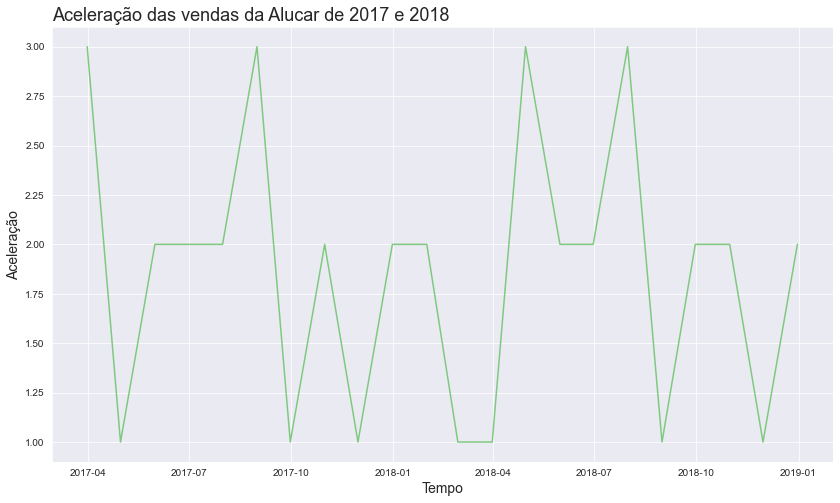

In [15]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

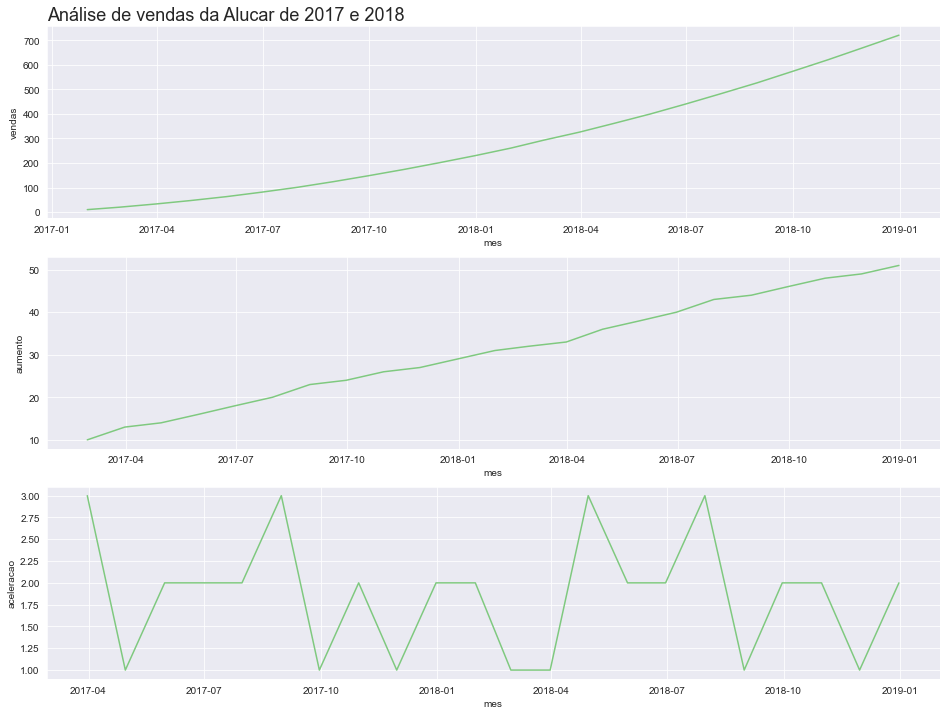

In [16]:
plt.figure(figsize=(16, 12))

ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(data=alucar, x='mes', y='vendas')

plt.subplot(3, 1, 2)
sns.lineplot(data=alucar, x='mes', y='aumento')

plt.subplot(3, 1, 3)
sns.lineplot(data=alucar, x='mes', y='aceleracao');

In [17]:
def plot_comparacao(x, y, dataset, titulo):
    plt.figure(figsize=(16, 12))

    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(data=dataset, x=x, y=y[0])

    plt.subplot(3, 1, 2)
    sns.lineplot(data=dataset, x=x, y=y[1])

    plt.subplot(3, 1, 3)
    sns.lineplot(data=dataset, x=x, y=y[2]);

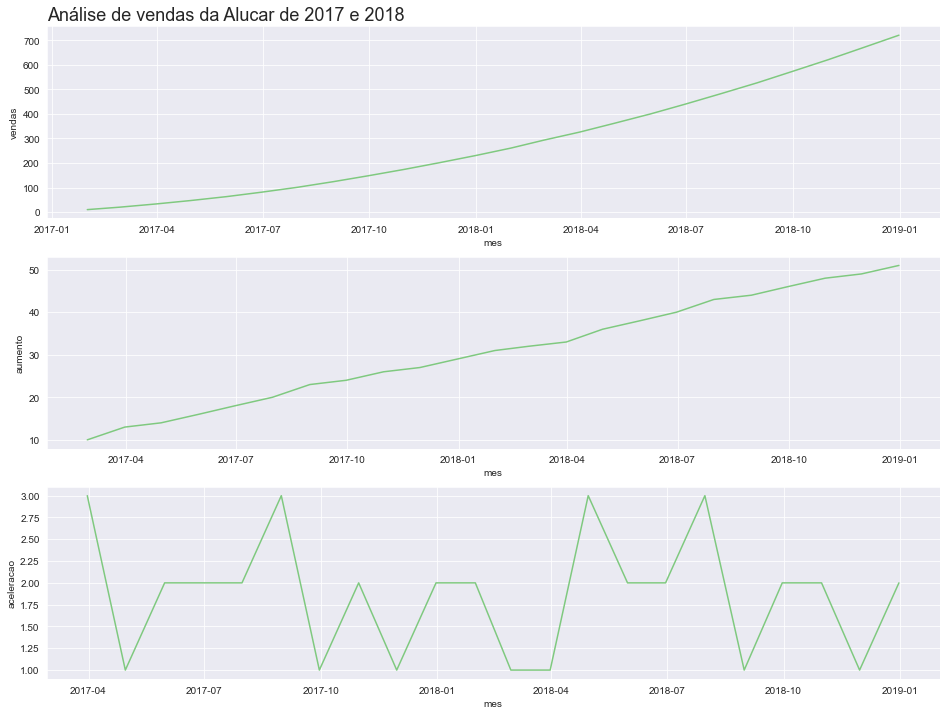

In [18]:
plot_comparacao('mes', ['vendas', 'aumento', 'aceleracao'], alucar, 'Análise de vendas da Alucar de 2017 e 2018')

In [19]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

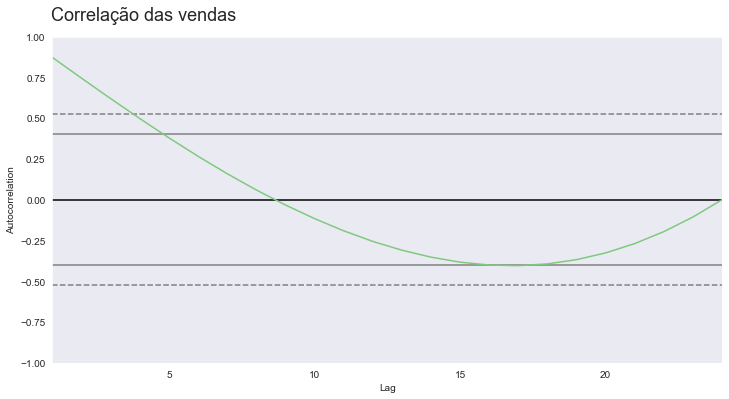

In [20]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.23, y=0.95)
autocorrelation_plot(alucar['vendas'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

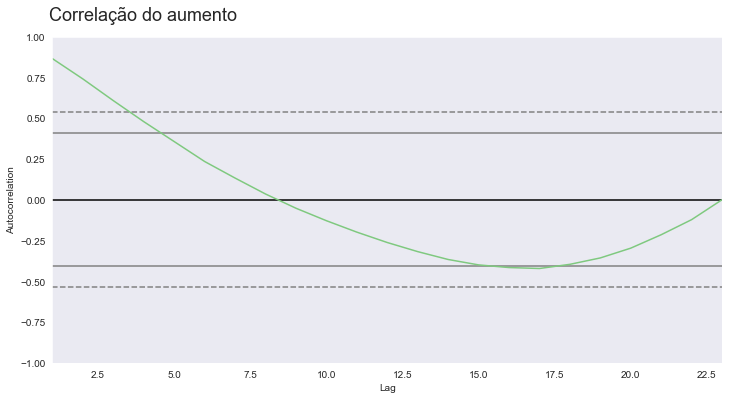

In [21]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.23, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

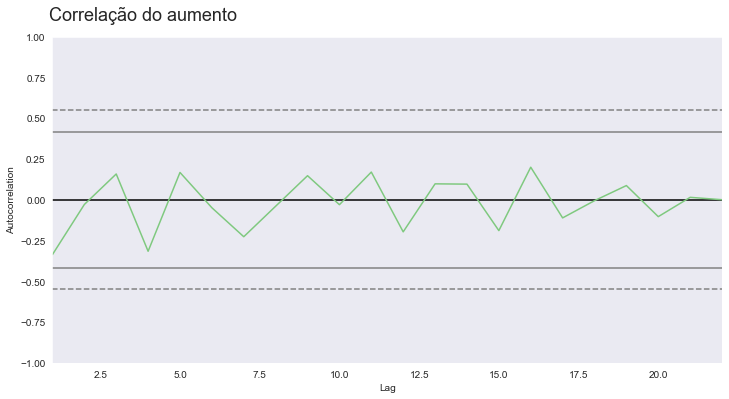

In [22]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.23, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])

|Autocorrelação|Interpretação|
|---|---|
|1|correlação perfeita positiva|
|0,7 a 0,9|correlação forte|
|0,4 a 0,7|correlação moderada|
|0,2 a 0,4|correlação moderada|
|0|correlação fraca|
|< 0|correlação negativa|
|-1|correlação perfeita negativa|

# Alucar -  Analisando assinantes da newletter

In [23]:
assinantes = pd.read_csv('./datasets/newsletter_alucar.csv')

assinantes.head(10)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [24]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [25]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [26]:
assinantes.isna().sum().sum()

0

In [27]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [28]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

assinantes.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


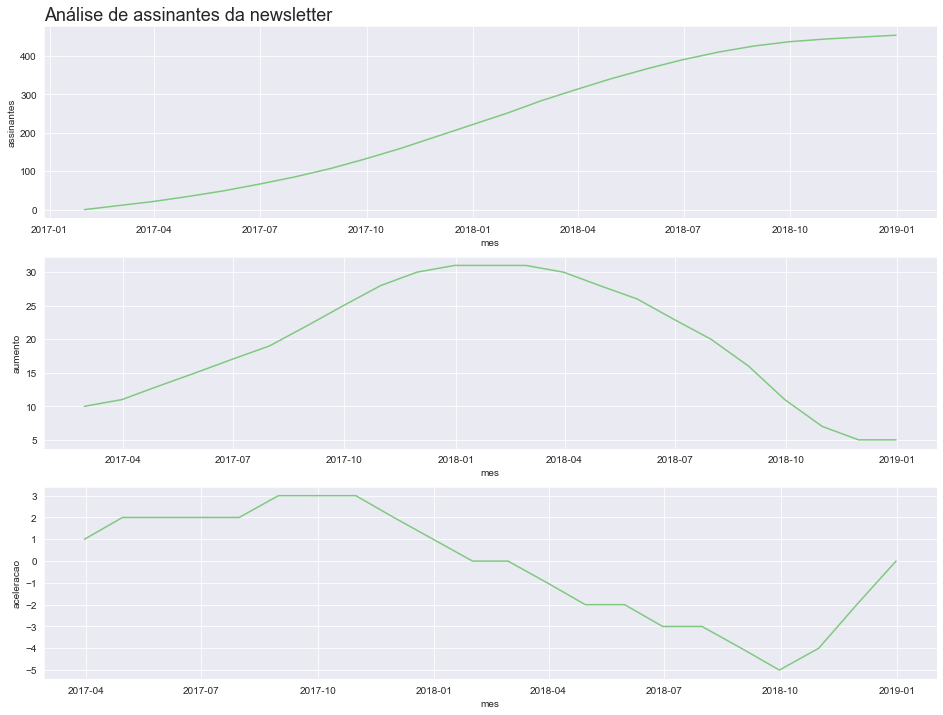

In [29]:
plot_comparacao('mes', ['assinantes', 'aumento', 'aceleracao'], assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [30]:
chocolura = pd.read_csv('./datasets/chocolura.csv')

chocolura.head(10)

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [31]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [32]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [33]:
chocolura.isna().sum().sum()

0

In [34]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

chocolura.head(10)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


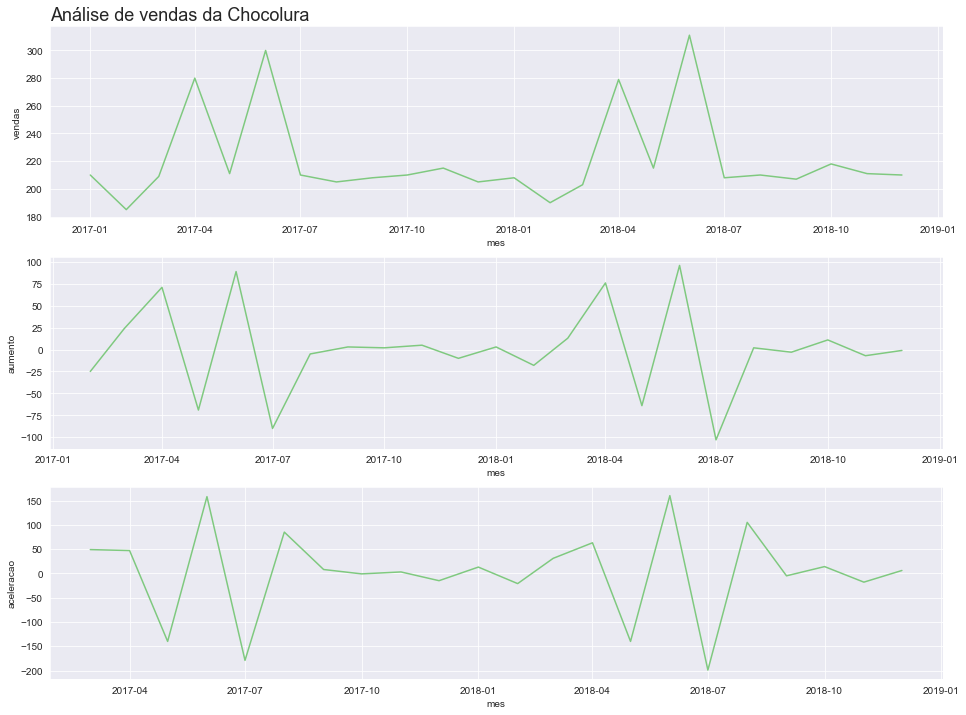

In [35]:
plot_comparacao('mes', ['vendas', 'aumento', 'aceleracao'], chocolura, 'Análise de vendas da Chocolura')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [36]:
vendas_por_dia = pd.read_csv('datasets/vendas_por_dia.csv')

vendas_por_dia.head(10)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
5,2018-10-06,18
6,2018-10-07,20
7,2018-10-08,50
8,2018-10-09,53
9,2018-10-10,56


In [37]:
vendas_por_dia.shape

(61, 2)

In [38]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [39]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [40]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [41]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

vendas_por_dia.head(10)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
5,2018-10-06,18,-33.0,-34.0
6,2018-10-07,20,2.0,35.0
7,2018-10-08,50,30.0,28.0
8,2018-10-09,53,3.0,-27.0
9,2018-10-10,56,3.0,0.0


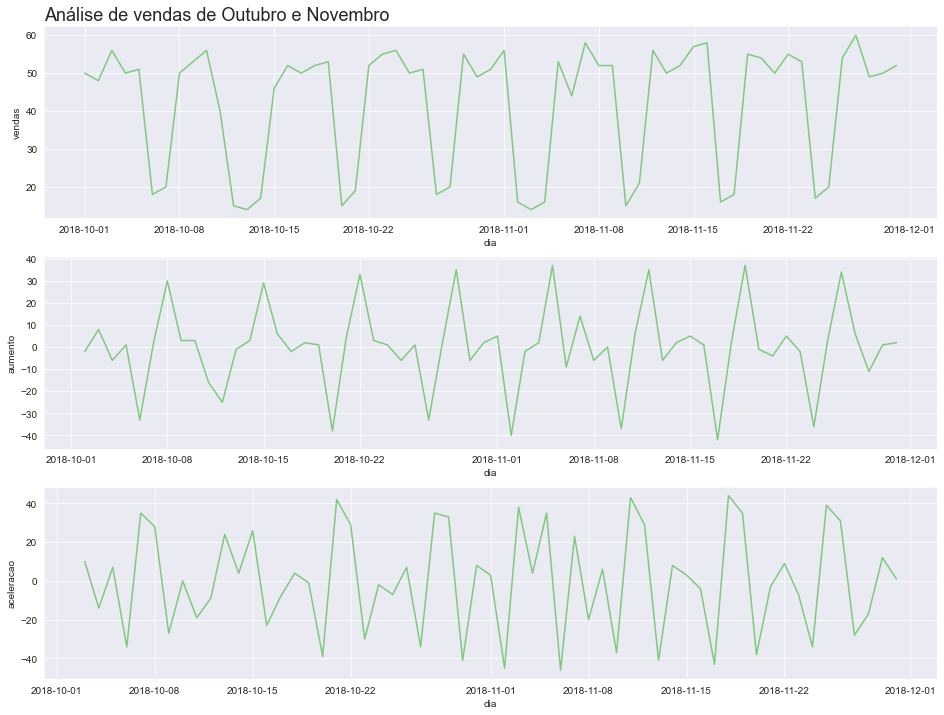

In [42]:
plot_comparacao('dia', ['vendas', 'aumento', 'aceleracao'], vendas_por_dia, 'Análise de vendas de Outubro e Novembro')

## Analisando sazonalidade

In [43]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [44]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [45]:
dias_traduzidos = {
    'Monday': 'Segunda-Feira', 
    'Tuesday': 'Terça-Feira', 
    'Wednesday': 'Quarta-Feira', 
    'Thursday': 'Quinta-Feira', 
    'Friday': 'Sexta-Feira', 
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

In [46]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feira
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


## Agrupando dias

In [47]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

vendas_agrupadas.head(10)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quinta-Feira,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feira,45.0,-7.0,-5.0
Terça-Feira,52.0,-1.0,-34.0


## Correlação das vendas diárias

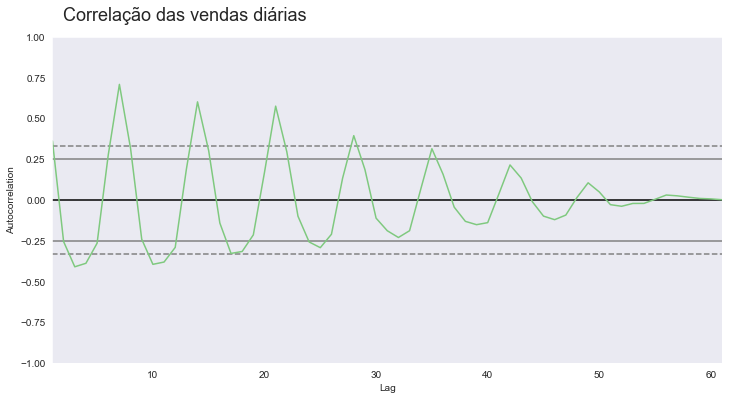

In [48]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.2777, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas']);

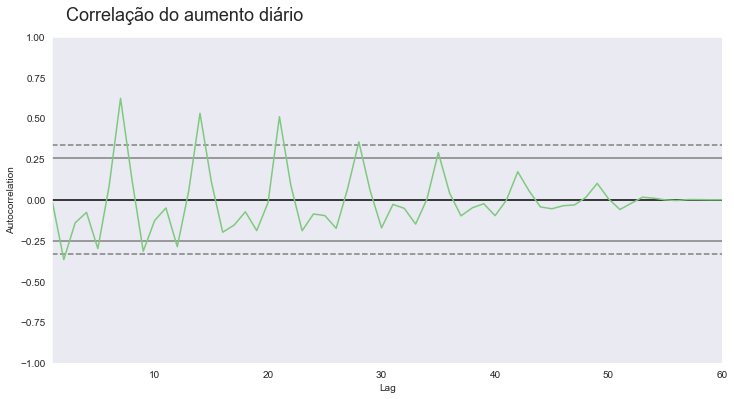

In [49]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento diário', fontsize=18, x=0.2777, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:]);

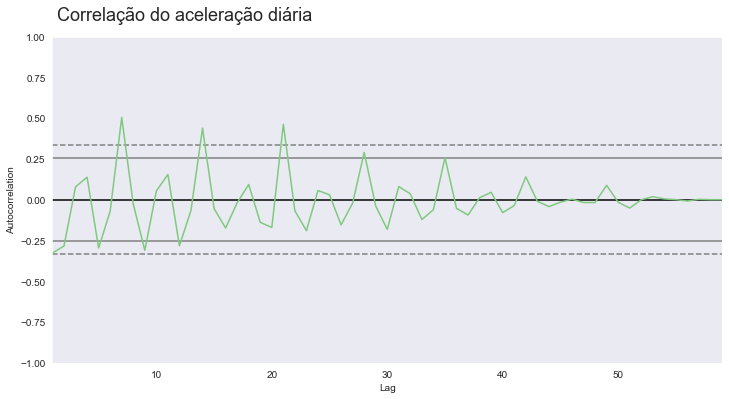

In [50]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aceleração diária', fontsize=18, x=0.2777, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:]);

# Cafelura - Análise de vendas

In [51]:
cafelura = pd.read_csv('datasets/cafelura.csv')

cafelura.head(10)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670
5,2017-06-30,7380
6,2017-07-31,8096
7,2017-08-31,12390
8,2017-09-30,11792
9,2017-10-31,13984


In [52]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [53]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [54]:
cafelura.shape

(24, 2)

In [55]:
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

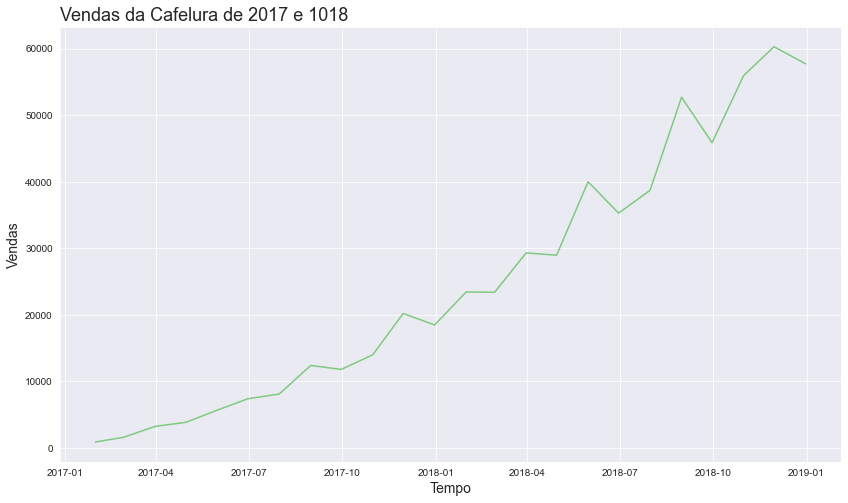

In [56]:
plotar('Vendas da Cafelura de 2017 e 1018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [57]:
quantidade_de_dias_de_fds = pd.read_csv('datasets/dias_final_de_semana.csv')

quantidade_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


# Satstmodels

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

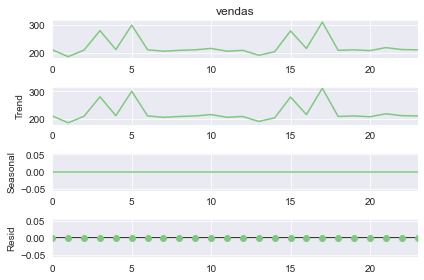

In [65]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)

ax = resultado.plot()

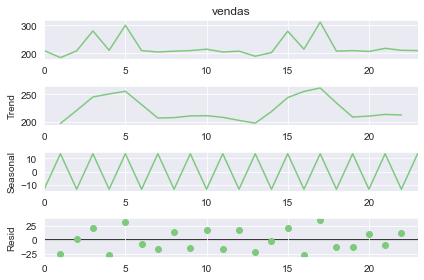

In [66]:
resultado = seasonal_decompose(chocolura['vendas'], period=2)

ax = resultado.plot()